In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

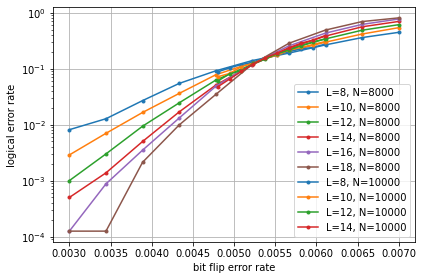

In [177]:
repeat = 10
L_list = [8,10,12,14,16,18]

plt.figure(1)#,figsize=(5,3))
for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        plt.plot(p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))

for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_fine.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        plt.plot(p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L),label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))


# plt.plot([0.0293,0.0293],[0,0.8],"k--")
# plt.xticks(np.arange(0.004,0.0071,0.001))
plt.yscale("log")
# plt.ylim([0.0,0.6])
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
plt.legend()
plt.tight_layout()
plt.grid()
# plt.savefig("figs/fcts-threshold.pdf")
plt.show()

## with loss

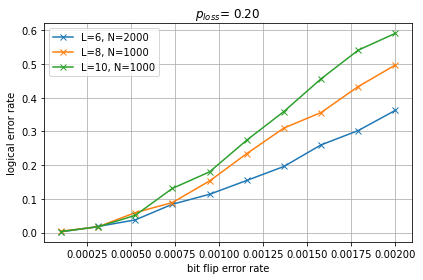

In [222]:
repeat = 24
L_list = [6,8,10]
prob_l = 0.2

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            # Ntot_loss += Nrep_loss
            # Ntot_flip += Nrep_flip
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    # failure_ratio = fail_prob_avg/(Ntot_flip*(Ntot_loss-loss_prob_avg))   
    if not first:
        # print(L, loss_prob_avg/Ntot)
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        # Ntot = Ntot_flip*(Ntot_loss-loss_prob)+loss_prob
        plt.plot(p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        # plt.plot(pz_list,loss_ratio+0*pz_list,"--", color="C%d" % (i_L))
        # plt.plot(pz_list,failure_ratio,"x-", label="L=%d" % (L))

plt.legend()
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
# plt.ylim([0.0,0.6])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.0s6,0.1,0.01))
plt.grid()
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

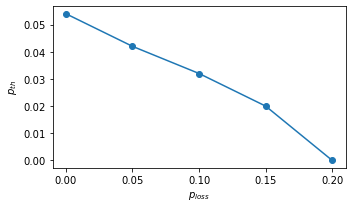

In [196]:
p_loss = [0,0.05,0.1,0.15,0.2]
p_th = [0.054,0.042,0.032,0.02,0]

plt.figure(1,figsize=(5,3))
plt.plot(p_loss,p_th,"o-")
plt.ylabel(r"$p_{th}$")
plt.xlabel(r"$p_{loss}$")
plt.xticks(p_loss)
plt.tight_layout()
plt.show()
